# Dealing with multiple samples

In [1]:
import sem
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
ns_path = 'ns-3'
script = 'main-propagation-loss-no-gnuplot'
campaign_dir = "results-propagation-loss"
campaign = sem.CampaignManager.new(ns_path, script, campaign_dir, overwrite=True, check_repo=False)

In [3]:
print(campaign)

--- Campaign info ---
script: main-propagation-loss-no-gnuplot
params: {'LossModel': 'Friis', 'Samples': 10.0}
HEAD: 
Runner type: <class 'sem.parallelrunner.ParallelRunner'>
-----------


In [4]:
params = {
    'LossModel': ['Friis', 'LogDistance', 'Random', 'ThreeLogDistance', 'ThreeLogDistanceDifferentExponents', 'Nakagami', 'ThreeLogDistanceAndNakagami'],
    'Samples': [10000]
}
campaign.run_missing_simulations(params, runs=1)

Running simulations: 100%|██████████| 7/7 [00:02<00:00,  3.23simulation/s]


In [5]:
example_result = campaign.db.get_complete_results()[0]

In [6]:
example_result['output']['stdout'].splitlines()[:10]

['100 -76.6777',
 '100 -76.6777',
 '100 -76.6777',
 '100 -76.6777',
 '100 -76.6777',
 '100 -76.6777',
 '100 -76.6777',
 '100 -76.6777',
 '100 -76.6777',
 '100 -76.6777']

In [7]:
@sem.utils.yields_multiple_results
@sem.utils.output_labels(['Distance [m]', 'Receive Power [dBm]'])
@sem.utils.only_load_some_files(r'.*stdout.*')
def get_propagation_samples(result):
    data = []
    for line in result['output']['stdout'].splitlines():
        data += [[float (i) for i in line.split(" ")]]
    return data

In [8]:
display(get_propagation_samples(example_result))

[[100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],
 [100.0, -76.6777],


In [9]:
data = campaign.get_results_as_dataframe(get_propagation_samples,
                                        verbose=True,
                                        parallel_parsing=True)

Parsing Results: 100%|██████████| 7/7 [00:06<00:00,  1.07result/s]


In [10]:
display(data)

,LossModel,Samples,RngRun,Distance [m],Receive Power [dBm]
0,ThreeLogDistance,10000,3,100.0,-64.67770
1,ThreeLogDistance,10000,3,100.0,-64.67770
2,ThreeLogDistance,10000,3,100.0,-64.67770
3,ThreeLogDistance,10000,3,100.0,-64.67770
4,ThreeLogDistance,10000,3,100.0,-64.67770
...,...,...,...,...,...
1329995,Nakagami,10000,5,1900.0,12.26070
1329996,Nakagami,10000,5,1900.0,14.47580
1329997,Nakagami,10000,5,1900.0,9.88632
1329998,Nakagami,10000,5,1900.0,21.36620


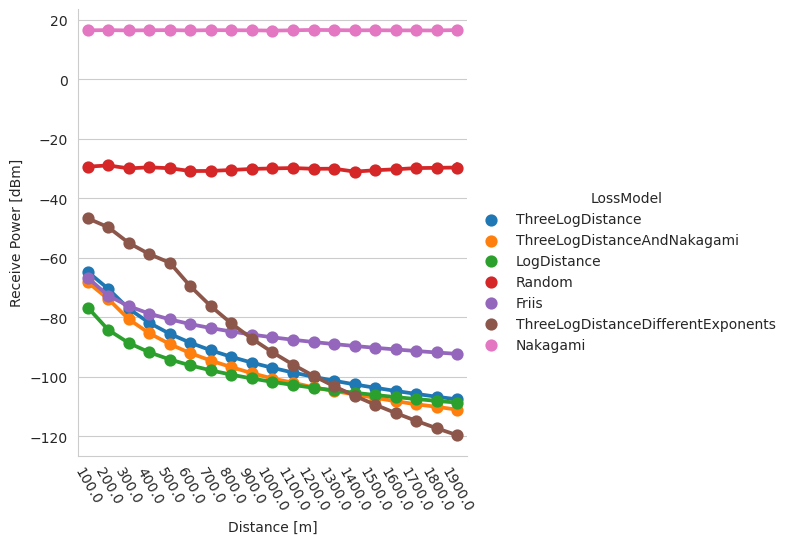

In [11]:
g = sns.catplot(data=data,
           x='Distance [m]',
           y='Receive Power [dBm]',
           hue='LossModel',
           kind='point')
g.set_xticklabels(rotation=-60)
plt.show()

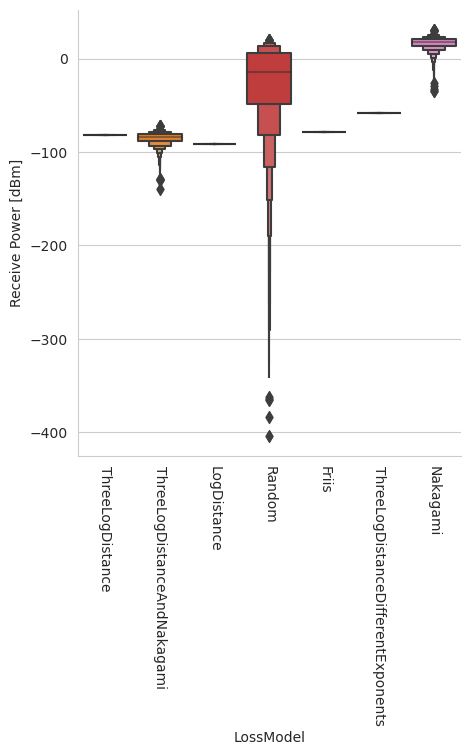

In [12]:
g = sns.catplot(data=data[(data['Distance [m]'] == 400)],
           x='LossModel',
           y='Receive Power [dBm]',
           kind='boxen')
g.set_xticklabels(rotation=-90)
plt.show()

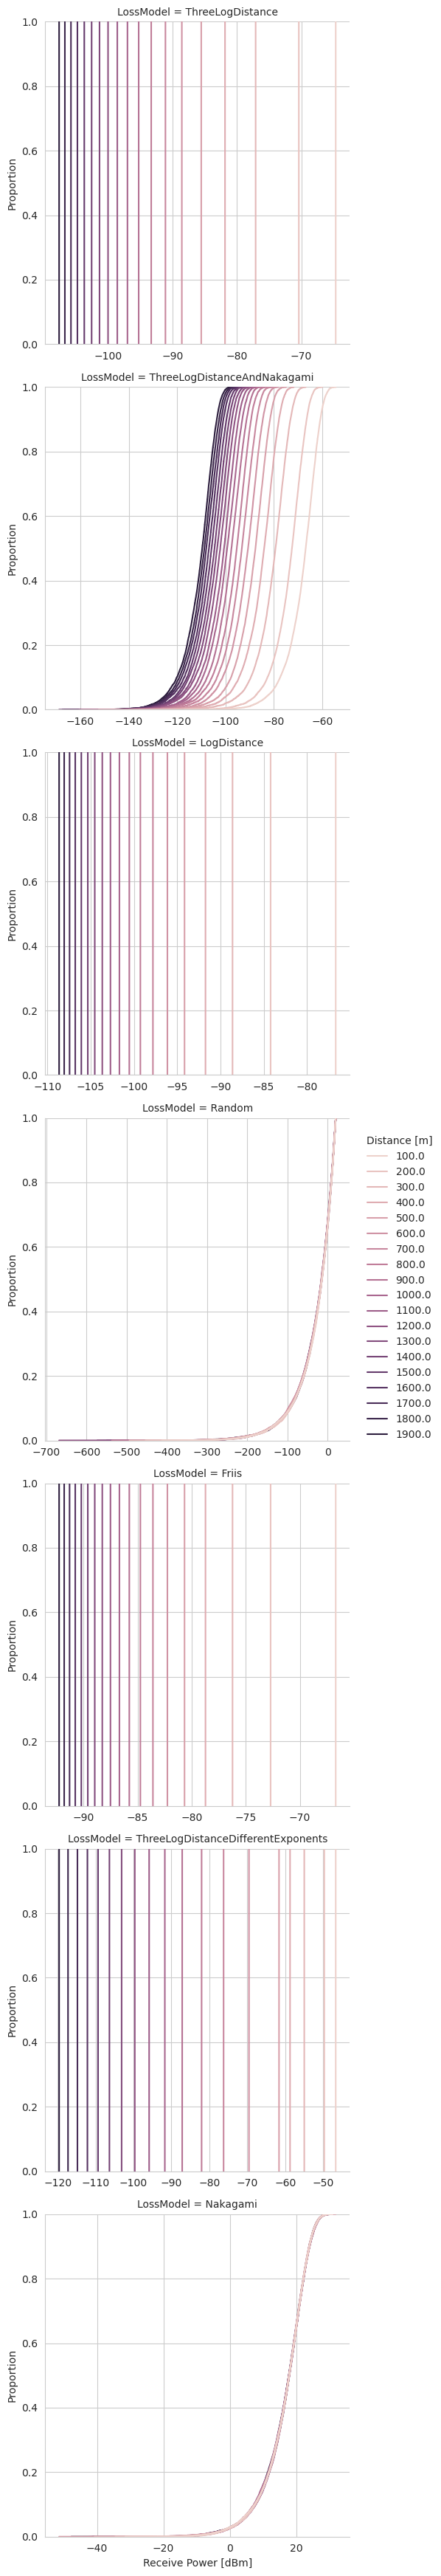

In [13]:
sns.displot(data=data,
            x='Receive Power [dBm]',
            hue='Distance [m]',
            row='LossModel',
            facet_kws={'sharex':False},
           kind='ecdf')
plt.show()